In [1]:
import pandas as pd
import numpy as np
import os
import glob
%matplotlib inline
#from pylab import *
import matplotlib.pyplot as plt
import string

In [2]:
filepath = '/fMRI/NLine'
os.chdir(filepath)

In [3]:
subj = ['s_02003', 's_02004']
runs = ['run1', 'run2', 'run3', 'run4']
filenames = {}
for s in subj:
    filenames[s] = []
    for r in runs:
        tmpfilepath = filepath+'/'+s+'/'+r+'_TwoPhasesFull.feat'
        os.chdir(tmpfilepath)
        temp = glob.glob('featqueryATLASArea*/mean_mask_ts.txt')
        temp = [r+'_TwoPhasesFull.feat/'+x for x in temp]
        filenames[s].extend(temp)
filenames

{'s_02003': ['run1_TwoPhasesFull.feat/featqueryATLASArea17/mean_mask_ts.txt',
  'run1_TwoPhasesFull.feat/featqueryATLASArea20/mean_mask_ts.txt',
  'run1_TwoPhasesFull.feat/featqueryATLASArea21/mean_mask_ts.txt',
  'run1_TwoPhasesFull.feat/featqueryATLASArea32/mean_mask_ts.txt',
  'run1_TwoPhasesFull.feat/featqueryATLASArea47/mean_mask_ts.txt',
  'run1_TwoPhasesFull.feat/featqueryATLASArea6/mean_mask_ts.txt',
  'run2_TwoPhasesFull.feat/featqueryATLASArea17/mean_mask_ts.txt',
  'run2_TwoPhasesFull.feat/featqueryATLASArea20/mean_mask_ts.txt',
  'run2_TwoPhasesFull.feat/featqueryATLASArea21/mean_mask_ts.txt',
  'run2_TwoPhasesFull.feat/featqueryATLASArea32/mean_mask_ts.txt',
  'run2_TwoPhasesFull.feat/featqueryATLASArea47/mean_mask_ts.txt',
  'run2_TwoPhasesFull.feat/featqueryATLASArea6/mean_mask_ts.txt',
  'run3_TwoPhasesFull.feat/featqueryATLASArea17/mean_mask_ts.txt',
  'run3_TwoPhasesFull.feat/featqueryATLASArea20/mean_mask_ts.txt',
  'run3_TwoPhasesFull.feat/featqueryATLASArea21/mean_

In [4]:
roi_names = {'Area1': 'IPS0_L',
             'Area2': 'IPS0_R',
             'Area3': 'LOC_L',
             'Area4': 'LOC_R',
             'Area5': 'MT_L',
             'Area6': 'MT_R',
             'Area7': 'V1d_L',
             'Area8': 'V1d_R',
             'Area9': 'V1v_L',
             'Area10': 'V1v_R',
             'Area11': 'V2d_L',
             'Area12': 'V2d_R',
             'Area13': 'V2v_L',             
             'Area14': 'V2v_R',
             'Area15': 'V3ab_L',
             'Area16': 'V3ab_R',
             'Area17': 'V3d_L',
             'Area18': 'V3d_R',
             'Area19': 'V3v_L',
             'Area20': 'V3v_R',
             'Area21': 'V4_L',
             'Area22': 'V4_R',
             'Area23': 'VO1_L',
             'Area24': 'VO1_R'}
roi_namesATLAS = {'Area0': 'Frontal_Pole',
             'Area1': 'Insular_Cortex',
             'Area2': 'Superior_Frontal_Gyrus',
             'Area3': 'Middle_Frontal_Gyrus',
             'Area4': 'Inferior_Frontal_Gyrus1',
             'Area5': 'Inferior_Frontal_Gyrus2',
             'Area6': 'Precentral_Gyrus',
             'Area7': 'Temporal_Pole',
             'Area8': 'Superior_Temporal_Gyrus_Ant',
             'Area9': 'Superior_Temporal_Gyrus_Pos',
             'Area10': 'Middle_Temporal_Gyrus_Ant',
             'Area11': 'Middle_Temporal_Gyrus_Pos',
             'Area12': 'Inferior_Temporal_Gyrus_Ant',
             'Area13': 'Inferior_Temporal_Gyrus_TempOcc',             
             'Area14': 'Inferior_Temporal_Gyrus_Pos',
             'Area15': 'Inferior_Temporal_Gyrus_TempOcc',
             'Area16': 'Postcentral_Gyrus',
             'Area17': 'Superior_Parietal_Lobule',
             'Area18': 'Supramarginal_Gyrus_Ant',
             'Area19': 'Supramarginal_Gyrus_Pos',
             'Area20': 'Angular_Gyrus',
             'Area21': 'Lateral_Occipital_Cortex_Sup',
             'Area22': 'Lateral_Occipital_Cortex_Inf',
             'Area23': 'Intracalcarine_Cortex',
             'Area24': 'Frontal_Medial_Cortex',
             'Area25': 'Juxtapositional_Lobule',
             'Area26': 'Subcallosal_Cortex',
             'Area27': 'Paracingulate_Gyrus',
             'Area28': 'Paracingulate_Gyrus',
             'Area29': 'ACC',
             'Area30': 'PCC',
             'Area31': 'Cuneal_Cortex',
             'Area32': 'OFC',
             'Area33': 'Parahippocampal_Gyrus_Ant',
             'Area34': 'Parahippocampal_Gyrus_Pos',
             'Area35': 'Lingual_Gyrus',
             'Area36': 'Temporal_Fusiform_Cortex_Ant',
             'Area37': 'Temporal_Fusiform_Cortex_Pos',
             'Area38': 'Temporal_Occipital_Fusiform_Cortex',
             'Area39': 'Occipital_Fusiform_Gyrus',
             'Area40': 'Frontal_Opercular_Cortex',
             'Area41': 'Central_Opercular_Cortex',
             'Area42': 'Parietal_Opercular_Cortex',
             'Area43': 'Planum_Polare',
             'Area44': 'Heschls_Gyrus',
             'Area45': 'Planum_Temporale',
             'Area46': 'Supracalcarine_Cortex',
             'Area47': 'Occipital_Pole',
             'SubArea10': 'Left_Accumbens',
             'SubArea15': 'Right_Causate',
             'SubArea16': 'Right_Putamen',
             'SubArea17': 'Right_Pallidum',
             'SubArea18': 'Right_Hippocampus',
             'SubArea19': 'Right_Amygdala',
             'SubArea20': 'Right_Accumbens',
             'SubArea4': 'Left_Caudate',
             'SubArea5': 'Left_Putamen',
             'SubArea6': 'Left_Putamen',
             'SubArea8': 'Left_Hippocampus',
             'SubArea9': 'Left_Amygdala',
             'IPS': 'IPS'}

In [5]:
os.chdir(filepath+'/s_02003')
#Need to check what is the character number for beginning of area this time should be consistent
peristimulus02003 = pd.concat([pd.read_csv(item, names=[item[0:4]+item[38:-17]]) for item in filenames['s_02003']], axis=1)
names = []
for i in peristimulus02003.keys():
    key = i.find('Run')
    end_cond = key + 5
    roi_key = i.find('Ar')
    name = i[0:end_cond]+'_'+i[roi_key:]
    names.append(name)
peristimulus02003.columns = names
peristimulus02003

,run1_Area17,run1_Area20,run1_Area21,run1_Area32,run1_Area47,run1_Area6,run2_Area17,run2_Area20,run2_Area21,run2_Area32,...,run3_Area21,run3_Area32,run3_Area47,run3_Area6,run4_Area17,run4_Area20,run4_Area21,run4_Area32,run4_Area47,run4_Area6
0,13846.73870,13406.99685,14925.32914,8147.262824,11420.37733,12421.57147,13717.87031,13244.06691,14719.50455,8216.612479,...,14680.89973,8274.948735,11053.47295,12412.52675,13473.29118,13128.70770,14590.76700,8326.920263,10953.82408,12393.11449
1,13829.71376,13398.59649,14891.69044,8146.446900,11333.42037,12406.28805,13700.67518,13236.30219,14696.04449,8225.178179,...,14660.79063,8269.400141,11033.93237,12389.97447,13451.74721,13144.63462,14595.79536,8306.521783,10926.51473,12382.69150
2,13804.94405,13347.38512,14854.02196,8130.889136,11311.79484,12412.10856,13669.97776,13191.43431,14653.51699,8216.521498,...,14642.69313,8255.889979,11040.19641,12400.31379,13506.82962,13133.29778,14657.62507,8303.346460,10978.91161,12415.29505
3,13813.48440,13354.30648,14867.13068,8185.503363,11343.81304,12431.97342,13678.21181,13201.75612,14661.32364,8230.896174,...,14658.56555,8257.781319,11039.71220,12406.60903,13518.57348,13125.64224,14669.44671,8300.477713,10997.99315,12429.74479
4,13836.28087,13380.99570,14870.44401,8202.686159,11312.11286,12450.70338,13684.58610,13206.09371,14653.89824,8230.642619,...,14637.51511,8244.559432,11058.93473,12410.09202,13470.77358,13112.55370,14614.39528,8279.557812,10933.84944,12402.83185
5,13858.86125,13366.41472,14872.71927,8202.006603,11315.12223,12474.31816,13731.09362,13216.39170,14708.40571,8224.656525,...,14667.94751,8240.219642,11102.87643,12471.93749,13496.65002,13117.23927,14658.38599,8288.049726,11003.44519,12456.98868
6,13917.41733,13383.22241,14906.78312,8207.144251,11333.98333,12512.46080,13801.23687,13265.59825,14766.34871,8255.837142,...,14734.90224,8284.356159,11168.56543,12537.49000,13617.36562,13144.13200,14750.33422,8312.050616,11071.64171,12550.79990
7,13889.29406,13382.90365,14870.32952,8179.789284,11288.72711,12494.00601,13811.21311,13313.12134,14767.83473,8246.478365,...,14758.19283,8293.399339,11184.91718,12524.87807,13675.21374,13180.35692,14777.52870,8309.029309,11097.86522,12566.90999
8,13831.25258,13355.63854,14845.22895,8162.777195,11296.80258,12445.63102,13750.23097,13305.58342,14746.15235,8258.109681,...,14691.72442,8268.653373,11131.91634,12457.37093,13602.79345,13150.34045,14708.40489,8320.664974,11078.00210,12502.08056
9,13872.54539,13385.51041,14883.88348,8198.661085,11332.72628,12474.73700,13744.83666,13300.52196,14751.28646,8287.280175,...,14607.63527,8292.973804,11070.90697,12428.93428,13513.62351,13076.92615,14629.50651,8286.498365,11013.79603,12442.04171


In [7]:
os.chdir(filepath+'/s_02004')
#Need to check what is the character number for beginning of area this time should be consistent
peristimulus02004 = pd.concat([pd.read_csv(item, names=[item[0:4]+item[38:-17]]) for item in filenames['s_02004']], axis=1)
names = []
for i in peristimulus02004.keys():
    key = i.find('Run')
    end_cond = key + 5
    roi_key = i.find('Ar')
    name = i[0:end_cond]+'_'+i[roi_key:]
    names.append(name)
peristimulus02004.columns = names
peristimulus02004

,run1_Area17,run1_Area20,run1_Area21,run1_Area32,run1_Area47,run1_Area6,run2_Area17,run2_Area20,run2_Area21,run2_Area32,...,run3_Area21,run3_Area32,run3_Area47,run3_Area6,run4_Area17,run4_Area20,run4_Area21,run4_Area32,run4_Area47,run4_Area6
0,12228.59383,14608.54708,13352.01355,8676.344684,9891.617571,11869.23364,12003.00494,14440.20087,13197.66867,8796.924856,...,13134.25228,8765.136900,9860.766062,11765.62749,11856.81299,14204.49654,13061.72939,8750.134533,10334.11573,11715.32802
1,12359.24180,14682.52060,13417.16702,8704.262754,9939.792604,11933.03523,11991.76314,14412.04129,13162.82119,8787.870394,...,13172.19670,8779.901308,9861.831264,11756.63146,11824.71329,14213.99353,13066.32247,8817.156134,10344.84930,11703.97466
2,12258.00707,14686.92970,13385.87424,8759.498520,9998.496139,11947.23276,11990.89579,14457.88417,13159.65473,8778.139925,...,13240.16776,8787.338315,9898.860289,11813.78538,12168.65087,14425.23782,13186.08404,8883.607492,10321.11943,11809.80347
3,12460.79562,14738.47937,13451.67251,8709.341584,9983.992031,12025.19339,11999.73701,14387.46983,13182.91697,8787.577456,...,13236.09226,8777.891640,9877.502302,11802.94314,12086.68050,14402.17532,13178.96566,8845.052806,10351.93393,11783.28089
4,12324.63576,14662.82534,13415.98132,8683.449936,9922.019382,11981.39279,12032.09264,14402.20500,13179.85072,8744.946982,...,13211.34310,8802.587750,9880.076802,11837.12455,11982.36777,14330.63494,13204.43061,8783.203083,10455.70610,11817.78152
5,12342.18437,14682.13311,13430.15338,8704.166168,9865.056082,11961.39231,12050.28211,14416.82161,13182.00261,8811.686280,...,13182.62098,8776.468096,9889.595434,11831.72429,12026.19597,14321.41564,13198.49626,8807.590839,10453.51360,11842.48631
6,12376.87343,14678.81724,13430.93881,8753.799704,9844.378444,11977.56037,12050.89172,14422.89546,13229.55886,8848.687837,...,13249.81033,8773.293009,9869.884192,11877.69848,11962.87120,14285.40362,13158.49815,8814.898224,10413.73713,11837.22594
7,12464.56257,14747.03382,13438.20780,8772.426558,9949.970018,12036.05578,12063.15557,14439.40586,13224.21129,8799.382199,...,13241.78871,8787.860278,9954.376001,11820.29809,11912.04493,14237.16587,13106.39322,8817.500865,10409.34828,11748.29161
8,12382.38429,14794.76700,13474.27004,8752.326761,10000.764240,12028.54269,12033.28312,14441.90673,13142.49873,8822.200134,...,13147.95687,8748.641432,9895.731879,11775.74630,11860.19418,14278.96304,13059.72356,8817.340595,10381.53174,11706.28286
9,12334.54945,14809.44572,13525.45920,8735.169696,10064.159190,11993.20716,12007.93566,14409.63844,13136.83464,8775.924222,...,13161.81018,8759.147814,9901.577580,11771.02383,11897.70201,14321.25277,13126.69642,8823.971179,10343.65560,11719.63509


In [9]:
os.chdir(filepath+'/s_02003/OnsetsTwoPhasesFull')
onsets = glob.glob('s_*.txt')
onsets02003 = pd.concat([pd.read_csv(item, names=[item[8:-4]+'_Onsets'], usecols=[0],sep='\t') for item in onsets], axis=1)
#ConC01003 = pd.concat([pd.read_csv(item, names=[item[0:11]+item[43:-17]]) for item in filenames['s_01003']], axis=1)
#ConNC01003 = pd.read_csv('s_01003_Comp_Run_0_CONS_NC.txt', names=['SecsOnset'],usecols=[0],sep='\t')
#Dec01003 = pd.read_csv('s_01003_Comp_Run_0_DEC.txt', names=['SecsOnset'],usecols=[0],sep='\t')
onsets02003

,Neg_run1_CONS_Onsets,Neg_run1_DEC_Onsets,Neg_run2_CONS_Onsets,Neg_run2_DEC_Onsets,Neg_run3_CONS_Onsets,Neg_run3_DEC_Onsets,Neg_run4_CONS_Onsets,Neg_run4_DEC_Onsets,Pos_run1_CONS_Onsets,Pos_run1_DEC_Onsets,...,run4_DEC_CTCH_Onsets,run4_DEC_MISS_Onsets,Word_run1_CONS_Onsets,Word_run1_DEC_Onsets,Word_run2_CONS_Onsets,Word_run2_DEC_Onsets,Word_run3_CONS_Onsets,Word_run3_DEC_Onsets,Word_run4_CONS_Onsets,Word_run4_DEC_Onsets
0,2.508008,19.020832,397.016035,412.026762,2.519270,6.522544,199.507252,206.054929,200.518259,204.001585,...,7.007344,18.533072,397.516835,403.023748,2.519764,32.016189,203.003682,209.018369,1.505346,32.033442
1,13.511338,30.502330,408.013590,423.027040,13.017993,16.022767,215.509903,220.022015,211.505534,216.018680,...,43.500391,NaN,411.007415,417.017808,14.506830,43.000153,215.507782,221.045118,14.008278,56.517587
2,26.503022,66.031017,419.020962,432.510620,25.504657,29.023035,226.515518,229.522318,222.504053,228.018982,...,170.027322,NaN,423.508041,426.524464,28.004626,65.000466,227.519629,231.028720,28.015552,66.517788
3,37.517973,76.503249,429.511226,444.500719,35.011260,53.516598,237.511436,254.506405,234.012855,261.503145,...,187.021076,NaN,434.012622,438.508096,38.505866,93.001214,237.004299,281.013382,39.516038,76.510647
4,47.009622,104.532092,440.505003,457.517412,47.006705,79.524777,250.008037,265.506566,244.505872,272.003427,...,241.508303,NaN,444.508698,458.513469,50.504792,103.001526,249.010909,302.017589,50.507160,89.501792
5,61.506618,130.004121,451.015564,472.537844,61.508079,90.508085,262.017309,275.023619,258.003824,285.020404,...,286.523946,NaN,455.505583,470.511662,62.010909,115.018456,265.014779,315.564411,63.518375,100.518719
6,72.505360,141.016508,466.505477,485.012099,74.508725,103.008531,271.508586,302.524333,267.504377,311.504676,...,364.509495,NaN,466.002954,492.526296,74.011295,127.502255,276.513395,327.014630,72.516118,111.527217
7,85.011782,153.008933,480.004561,495.500721,86.510725,129.009151,282.020202,315.007947,278.510063,332.527450,...,385.026666,NaN,477.522041,507.026696,86.026161,137.519156,288.003788,338.031594,85.003806,124.519309
8,99.513628,166.000410,492.013771,507.029376,99.510450,153.012500,295.504445,326.524939,291.505439,344.526840,...,401.527047,NaN,489.003816,534.027815,100.003175,149.510057,298.514975,362.508477,97.007010,137.019690
9,114.004416,176.017658,502.504184,519.013103,109.007356,162.510150,309.009652,339.025428,304.508548,356.014300,...,482.529622,NaN,500.011028,547.011117,109.003787,163.527457,311.009237,374.582614,107.004748,148.019942


In [11]:
os.chdir(filepath+'/s_02004/OnsetsTwoPhasesFull')
onsets = glob.glob('s*.txt')
onsets02004 = pd.concat([pd.read_csv(item, names=[item[8:-4]+'_Onsets'], usecols=[0],sep='\t') for item in onsets], axis=1)
#ConC01010 = pd.concat([pd.read_csv(item, names=[item[0:11]+item[43:-17]]) for item in filenames['s_01010']], axis=1)
#ConNC01010 = pd.read_csv('s_01010_Comp_Run_0_CONS_NC.txt', names=['SecsOnset'],usecols=[0],sep='\t')
#Dec01010 = pd.read_csv('s_01010_Comp_Run_0_DEC.txt', names=['SecsOnset'],usecols=[0],sep='\t')
onsets02004

,Neg_run1_CONS_Onsets,Neg_run1_DEC_Onsets,Neg_run2_CONS_Onsets,Neg_run2_DEC_Onsets,Neg_run3_CONS_Onsets,Neg_run3_DEC_Onsets,Neg_run4_CONS_Onsets,Neg_run4_DEC_Onsets,Pos_run1_CONS_Onsets,Pos_run1_DEC_Onsets,...,run4_DEC_CTCH_Onsets,run4_DEC_MISS_Onsets,Word_run1_CONS_Onsets,Word_run1_DEC_Onsets,Word_run2_CONS_Onsets,Word_run2_DEC_Onsets,Word_run3_CONS_Onsets,Word_run3_DEC_Onsets,Word_run4_CONS_Onsets,Word_run4_DEC_Onsets
0,398.001052,415.508301,3.001248,30.502751,200.002354,205.501439,3.503658,8.002587,5.002440,18.514448,...,100.505019,325.511323,199.506665,206.012870,200.002429,230.524880,1.502709,8.029199,398.002296,412.013499
1,411.003061,427.008594,15.502472,58.003683,212.501924,216.518392,16.001672,21.003014,15.003010,31.015157,...,151.006668,NaN,215.005520,230.036542,213.502651,255.008820,16.003352,22.012828,408.502010,425.513929
2,423.001150,439.508930,25.502531,68.503968,226.002607,232.502174,27.502426,32.003239,26.002834,40.515200,...,160.506954,NaN,224.503987,241.003489,226.002113,264.509292,29.502546,34.013193,418.501234,437.514239
3,436.001749,462.009608,40.502654,80.004262,239.502039,243.502473,39.003031,43.003450,37.001265,51.015280,...,171.506944,NaN,237.001933,252.503966,237.002408,287.509905,41.502683,45.513704,433.002207,449.514770
4,445.501306,473.009895,53.501990,89.504474,249.501843,276.003358,50.001457,53.003967,46.502800,62.015854,...,204.507733,NaN,248.502666,262.004237,248.003013,311.510602,51.502248,68.514123,444.003115,476.515500
5,455.001599,486.510263,65.501183,103.504749,260.501665,288.503698,59.003069,64.504198,58.001174,75.015847,...,255.009308,NaN,259.001813,301.505377,261.502644,325.510713,63.503036,79.014491,458.001352,490.015748
6,469.001192,500.010760,76.002952,113.505030,272.502958,298.003967,71.002279,74.504520,68.502003,88.516101,...,336.011625,NaN,269.501648,312.005283,270.502705,338.011148,74.501544,89.514822,471.503200,504.016187
7,483.001419,514.010983,86.501669,140.505726,282.502899,320.504559,82.003061,89.004792,81.501191,100.516575,...,360.512176,NaN,283.502406,323.005790,283.002501,349.011577,85.502700,121.515658,486.502825,517.516628
8,496.002807,537.511547,96.501191,151.006045,294.502043,333.504947,96.503244,114.005673,96.001200,151.501370,...,402.513311,NaN,297.002726,333.505906,294.001375,361.511972,96.502294,134.015781,497.501356,528.500252
9,508.002898,549.011941,110.002481,162.506505,306.502329,348.005344,107.502767,126.505992,110.001986,164.501555,...,462.015130,NaN,308.502412,344.506427,308.002221,373.012165,107.001957,151.016587,511.502371,551.000588


##Convert to TRs

In [12]:
for col in onsets02003.keys():
    onsets02003[col] = onsets02003[col]/2

In [13]:
for col in onsets02004.keys():
    onsets02004[col] = onsets02004[col]/2

In [43]:
for col in onsets02003.keys():
    if col[-9] == 'S':
        continue
    onsets02003[col] = onsets02003[col].round()
onsets02003

,Neg_run1_CONS_Onsets,Neg_run1_DEC_Onsets,Neg_run2_CONS_Onsets,Neg_run2_DEC_Onsets,Neg_run3_CONS_Onsets,Neg_run3_DEC_Onsets,Neg_run4_CONS_Onsets,Neg_run4_DEC_Onsets,Pos_run1_CONS_Onsets,Pos_run1_DEC_Onsets,...,run4_DEC_CTCH_Onsets,run4_DEC_MISS_Onsets,Word_run1_CONS_Onsets,Word_run1_DEC_Onsets,Word_run2_CONS_Onsets,Word_run2_DEC_Onsets,Word_run3_CONS_Onsets,Word_run3_DEC_Onsets,Word_run4_CONS_Onsets,Word_run4_DEC_Onsets
0,1,10,199,206,1,3,100,103,100,102,...,4,9.266536,199,202,1,16,102,105,1,16
1,7,15,204,212,7,8,108,110,106,108,...,22,NaN,206,209,7,22,108,111,7,28
2,13,33,210,216,13,15,113,115,111,114,...,85,NaN,212,213,14,33,114,116,14,33
3,19,38,215,222,18,27,119,127,117,131,...,94,NaN,217,219,19,47,119,141,20,38
4,24,52,220,229,24,40,125,133,122,136,...,121,NaN,222,229,25,52,125,151,25,45
5,31,65,226,236,31,45,131,138,129,143,...,143,NaN,228,235,31,58,133,158,32,50
6,36,71,233,243,37,52,136,151,134,156,...,182,NaN,233,246,37,64,138,164,36,56
7,43,77,240,248,43,65,141,158,139,166,...,193,NaN,239,254,43,69,144,169,43,62
8,50,83,246,254,50,77,148,163,146,172,...,201,NaN,245,267,50,75,149,181,49,69
9,57,88,251,260,55,81,155,170,152,178,...,241,NaN,250,274,55,82,156,187,54,74


In [44]:
for col in onsets02004.keys():
    if col[-9] == 'S':
        continue
    onsets02004[col] = onsets02004[col].round()
onsets02004

,Neg_run1_CONS_Onsets,Neg_run1_DEC_Onsets,Neg_run2_CONS_Onsets,Neg_run2_DEC_Onsets,Neg_run3_CONS_Onsets,Neg_run3_DEC_Onsets,Neg_run4_CONS_Onsets,Neg_run4_DEC_Onsets,Pos_run1_CONS_Onsets,Pos_run1_DEC_Onsets,...,run4_DEC_CTCH_Onsets,run4_DEC_MISS_Onsets,Word_run1_CONS_Onsets,Word_run1_DEC_Onsets,Word_run2_CONS_Onsets,Word_run2_DEC_Onsets,Word_run3_CONS_Onsets,Word_run3_DEC_Onsets,Word_run4_CONS_Onsets,Word_run4_DEC_Onsets
0,199,208,2,15,100,103,2,4,3,9,...,50,162.755661,100,103,100,115,1,4,199,206
1,206,214,8,29,106,108,8,11,8,16,...,76,NaN,108,115,107,128,8,11,204,213
2,212,220,13,34,113,116,14,16,13,20,...,80,NaN,112,121,113,132,15,17,209,219
3,218,231,20,40,120,122,20,22,19,26,...,86,NaN,119,126,119,144,21,23,217,225
4,223,237,27,45,125,138,25,27,23,31,...,102,NaN,124,131,124,156,26,34,222,238
5,228,243,33,52,130,144,30,32,29,38,...,128,NaN,130,151,131,163,32,40,229,245
6,235,250,38,57,136,149,36,37,34,44,...,168,NaN,135,156,135,169,37,45,236,252
7,242,257,43,70,141,160,41,45,41,50,...,180,NaN,142,162,142,175,43,61,243,259
8,248,269,48,76,147,167,48,57,48,76,...,201,NaN,149,167,147,181,48,67,249,264
9,254,275,55,81,153,174,54,63,55,82,...,231,NaN,154,172,154,187,54,76,256,276


In [45]:
onsets02003['run4_DEC_CTCH_Onsets']

0       4
1      22
2      85
3      94
4     121
5     143
6     182
7     193
8     201
9     241
10    257
11    264
12    NaN
13    NaN
14    NaN
15    NaN
Name: run4_DEC_CTCH_Onsets, dtype: float64

In [46]:
trs = 10
meants02003 = []
meants02004 = []
for n in range(trs):
    meants02003.append(peristimulus02003['run1_Area17'].loc[onsets02003['Neg_run1_CONS_Onsets']+n].mean())
    meants02004.append(peristimulus02004['run1_Area17'].loc[onsets02004['Neg_run1_CONS_Onsets']+n].mean())
meants02003
meants02004

[12290.38916125,
 12299.238955625,
 12319.64259625,
 12339.816474000001,
 12338.077473333333,
 12303.107646666665,
 12298.632408,
 12294.832713333335,
 12316.393482857142,
 12343.458107142858]

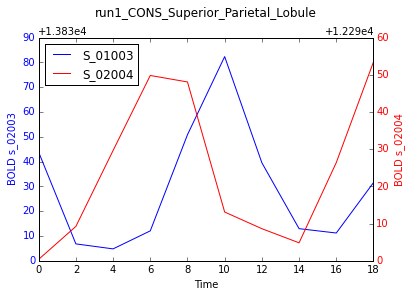

In [26]:
X = [0,2,4,6,8,10,12,14,16,18]
fig, ax1 = plt.subplots()
ax1.plot(X,meants02003,color='blue', label='S_01003')
ax1.set_ylabel('BOLD s_02003',color='b')
ax2 = ax1.twinx()
ax2.plot(X,meants02004,color='red', label='S_02004')
ax2.set_ylabel('BOLD s_02004',color='r')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=2)
ax1.set_xlabel('Time')
for tick in ax1.get_yticklabels():
    tick.set_color('b')
for tick in ax2.get_yticklabels():
    tick.set_color('r')
ax1.set_title('run1_CONS_'+roi_namesATLAS['Area17'], y=1.07)

In [22]:
cond = onsets02003.keys()[0].find('Onsets')
cond

14

In [23]:
area = peristimulus02003.keys()[0].find('Ar')
area

5

In [24]:
area_name = roi_namesATLAS[peristimulus02003.keys()[0][area:]]
area_name

'Superior_Parietal_Lobule'

In [25]:
tit = area_name+'_'+onsets02003.keys()[0][0:cond-1]
tit

'Superior_Parietal_Lobule_Neg_run1_CONS'

In [30]:
onsets02004.keys()

Index([u'Neg_run1_CONS_Onsets', u'Neg_run1_DEC_Onsets',
       u'Neg_run2_CONS_Onsets', u'Neg_run2_DEC_Onsets',
       u'Neg_run3_CONS_Onsets', u'Neg_run3_DEC_Onsets',
       u'Neg_run4_CONS_Onsets', u'Neg_run4_DEC_Onsets',
       u'Pos_run1_CONS_Onsets', u'Pos_run1_DEC_Onsets',
       u'Pos_run2_CONS_Onsets', u'Pos_run2_DEC_Onsets',
       u'Pos_run3_CONS_Onsets', u'Pos_run3_DEC_Onsets',
       u'Pos_run4_CONS_Onsets', u'Pos_run4_DEC_Onsets',
       u'run1_DEC_CTCH_Onsets', u'run1_DEC_MISS_Onsets',
       u'run2_DEC_CTCH_Onsets', u'run2_DEC_MISS_Onsets',
       u'run3_DEC_CTCH_Onsets', u'run3_DEC_MISS_Onsets',
       u'run4_DEC_CTCH_Onsets', u'run4_DEC_MISS_Onsets',
       u'Word_run1_CONS_Onsets', u'Word_run1_DEC_Onsets',
       u'Word_run2_CONS_Onsets', u'Word_run2_DEC_Onsets',
       u'Word_run3_CONS_Onsets', u'Word_run3_DEC_Onsets',
       u'Word_run4_CONS_Onsets', u'Word_run4_DEC_Onsets'],
      dtype='object')

In [47]:
os.chdir('/fMRI/NLine/PeristimulusFEATQUERYATLAS')
trs = 10
rois = peristimulus02003.keys()
#Change conditions
X = [0,2,4,6,8,10,12,14,16,18]
conditions = onsets02003.keys()
for roi in rois:
    area = roi.find('Ar')
    area_name = roi[area:]
    run = roi[0:area]
    for cond in conditions:
        nombre = cond
        nombre_tit = nombre[0:-7]
        if nombre_tit[-2] == 'S':
            continue
        meants02003 = []
        meants02004 = []
        for n in range(trs):
            meants02003.append(peristimulus02003[roi].loc[onsets02003[nombre]+n].mean())
            meants02004.append(peristimulus02004[roi].loc[onsets02004[nombre]+n].mean())
        fig, ax1 = plt.subplots()
        ax1.plot(X,meants02003, color='blue', label='S_02003')
        ax1.set_ylabel('BOLD s_02003', color='b')
        ax2 = ax1.twinx()
        ax2.plot(X,meants02004, color='red', label='S_02004')
        ax2.set_ylabel('BOLD s_02004', color='r')
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=0)
        ax1.set_xlabel('Time')
        tit = roi_namesATLAS[area_name]+'_'+nombre_tit
        ax1.set_title(tit, y=1.05)
        for tick in ax1.get_yticklabels():
            tick.set_color('b')
        for tick in ax2.get_yticklabels():
            tick.set_color('r')
        fname = tit+'.jpg'
        fig.subplots_adjust(left=0.15, right=0.85, bottom=0.1, top=0.9);
        fig.savefig(fname, dpi=200)
        fig.clf()
        plt.close(fig)